# Identifying Pneumonina using Convolutional Neural Networks

- Student Name: Kevin Spring
- Student pace: Flex
- Scheduled Project Review: December 12, 2022
- Instructor name: Morgan Jones
- Blog Post

# Summary


# Table of Contents

# Introduction

# Methodology

# Business Problem
United Healthcare is an insurance provider that caters to rural healthcare. The price of hiring radiologists has increased due to the lack of specialty care in rural areas. One major health concern for people of all ages is pneumonia which can be caused by infections by viruses or bacteria or caused by environmental hazards.

United Healthcare wants to utilize the chest x-ray data they have collected to predict if a patient has pneumonia or not. X-rays that are predicted to signs of pneumonia would be forwarded to a radiologist for confirmation.

## Data

In [5]:
# Download the data.zip file and unpack it into test-train split using python_splitter
import os
#from python_splitter import split_from_folder # https://github.com/bharatadk/python_splitter

# absolute path of unzipped data directory
PATH = os.path.join(os.path.abspath(os.getcwd()),'data/')
#split_from_folder(PATH, train = 0.6, test=0.2, val=0.2)

In [126]:
PATH

'/home/kevinspring/Documents/Flatiron/phase04/Pneumonia-detection-using-CNN/data/'

In [7]:
def file_count2(dir_path, class_name):
    count = 0
    for path in os.scandir(dir_path):
        if path.is_file():
            count += 1
    print(f'{class_name} file count: {count}')
    
file_count2(PATH, 'NORMAL')
file_count2(PATH, 'PNEUMONIA')

NORMAL file count: 1
PNEUMONIA file count: 1


# Data Description
The data consists of chest x-ray images of those that have pneumonia and those that do not (normal).
There is a total of 5,856 images of which 27% are in the normal class and 73% are in the pneumonia
class. This data is imbalanced and predicting that any chest x-ray is in the pneumonia class would
have an accuracy of 73%.

To get balanced data the pneumonia data will be randomly downsampled.

In [8]:
import os, shutil

data_path = os.path.join(os.path.abspath(os.getcwd()),'Train_Test_Folder/')
print(data_path)

train_dir = os.path.join(data_path, 'train/')
test_dir = os.path.join(data_path, 'test/')

train_normal = os.path.join(train_dir, 'NORMAL/')
train_pneumonia = os.path.join(train_dir, 'PNEUMONIA/')

/home/kevinspring/Documents/Flatiron/phase04/Pneumonia-detection-using-CNN/Train_Test_Folder/


Image number: 1266
normal picture title:  NORMAL2-IM-1128-0001-0002.jpeg
pneumonia picture title: person9_bacteria_39.jpeg


Text(0.5, 1.0, 'Pneumonia')

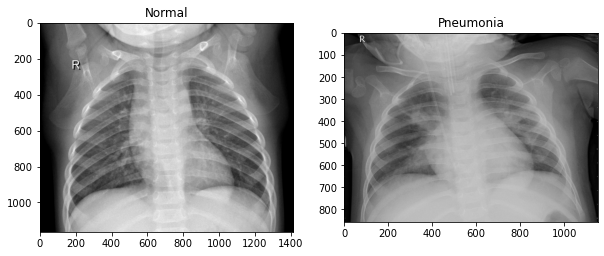

In [9]:
# Show a representative image
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

print(f'Image number: {len(os.listdir(train_normal))}')
rand_norm = np.random.randint(0, len(os.listdir(train_normal)))
norm_img = os.listdir(train_normal)[rand_norm]
print('normal picture title: ', norm_img)
norm_img_address = train_normal+norm_img

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_pneumonia)))

pneu_img =  os.listdir(train_pneumonia)[rand_norm]
pneu_img_address = train_pneumonia+pneu_img
print('pneumonia picture title:', pneu_img)

# Load the image
norm_load = Image.open(norm_img_address)
pneu_load = Image.open(pneu_img_address)

# Show the picture
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load, cmap='gray')
ax1.set_title('Normal')

ax2 = fig.add_subplot(1, 2, 2)
img_plot = plt.imshow(pneu_load, cmap='gray')
ax2.set_title('Pneumonia')

In [127]:
# Import data into tensorflow Dataset object
from tensorflow.keras.utils import image_dataset_from_directory

img_height = 128
img_width = 128
grayscale = 1
batch_size = 32

train_ds, val_ds = image_dataset_from_directory(train_dir,
                                        color_mode='grayscale',
                                        label_mode='binary',
                                        validation_split=0.2,
                                        subset='both',
                                        seed=42,
                                        #shuffle=False,
                                        image_size=(img_height, img_width),
                                        batch_size = batch_size)


test_ds = image_dataset_from_directory(test_dir,
                                       shuffle=False,
                                       color_mode='grayscale',
                                       label_mode='binary',
                                       image_size=(img_height, img_width)
                                      )

# oversample datasets
#train_ds_resample = tf.data.experimental.sample_from_datasets()

print('Batches for testing -->', test_ds.cardinality())
print('Batches for validating -->', val_ds.cardinality())
print('Batches for training -->', train_ds.cardinality())

Found 4684 files belonging to 2 classes.
Using 3748 files for training.
Using 936 files for validation.
Found 1172 files belonging to 2 classes.
Batches for testing --> tf.Tensor(37, shape=(), dtype=int64)
Batches for validating --> tf.Tensor(30, shape=(), dtype=int64)
Batches for training --> tf.Tensor(118, shape=(), dtype=int64)


In [164]:
from imblearn.over_sampling import SMOTE
reshaped_train_ds = train_ds.reshape(train_ds[0], -1)

AttributeError: 'PrefetchDataset' object has no attribute 'reshape'

In [163]:
for example in train_ds.take(1):
    image, label = example[0], example[1]

<tf.Tensor: shape=(32, 128, 128, 1), dtype=float32, numpy=
array([[[[0.00000000e+00],
         [0.00000000e+00],
         [9.68750000e-01],
         ...,
         [1.77187500e+01],
         [5.39062500e+00],
         [5.71875000e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [1.09687500e+01],
         [1.10000000e+01],
         [1.89062500e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [1.09687500e+01],
         [9.00000000e+00],
         [3.89062500e+00]],

        ...,

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [1.40000000e+01],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [1.40000000e+01],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [

In [128]:
print(train_ds.class_names)
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

['NORMAL', 'PNEUMONIA']
(32, 128, 128, 1)
(32, 1)


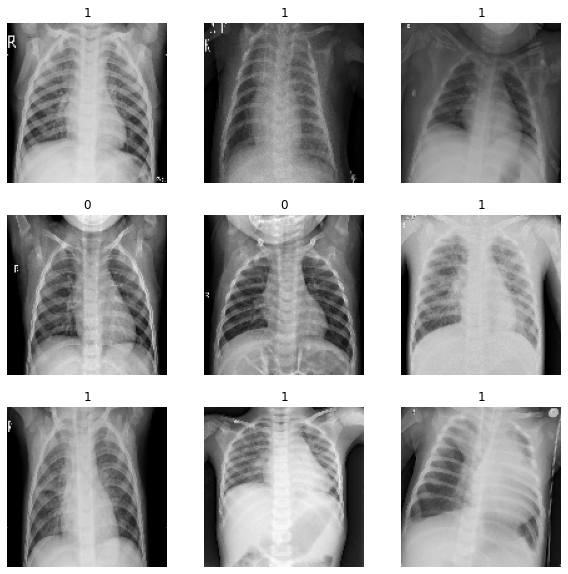

In [129]:
# Visualize the data

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'), cmap='gray')
        plt.title(int(labels[i]))
        plt.axis('off')

In [130]:
# Configure the dataset for performance
import tensorflow as tf
AUTOTUNE = tf.data.AUTOTUNE

# Dataset.cache keeps the images in memory after they're loaded off disk during the first epoch. 
# This will ensure the dataset does not become a bottleneck while training your model.
# Dataset.prefetch overlaps data preprocessing and model execution while training.
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Modeling
As this is an image classification problem, I will be using convolutional neural networks. I will start with a baseline model and add regularization if overfitting is a problem. For the last model I will combine a pretrained model.

In [131]:
# libraries for neural networks
#from tensorflow import keras
from tensorflow.keras.models import Sequential
import keras
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Rescaling
from keras.metrics import SpecificityAtSensitivity

In [132]:
def plot_fun(model, epochs):
    acc = model.history['accuracy']
    val_acc = model.history['val_accuracy']

    loss = model.history['loss']
    val_loss = model.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, 'g-', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, 'r-', label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, 'g-', label='Training Loss')
    plt.plot(epochs_range, val_loss, 'r-', label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

#plot_fun(baseline_cnn_fit)
# Visualize training results
#plot_fun(cnn_model)

In [185]:
#import tensorflow.keras import layers

batch_size = 32
learning_rate = 3e-4
epochs = 30

# Baseline model
inputs = keras.Input(shape=(img_height, img_width, grayscale))
x = Rescaling(1./255)(inputs)
x = Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)
outputs = Dense(1, activation='sigmoid')(x)
model_baseline = keras.Model(inputs=inputs, outputs=outputs)

# Compile the Neural network
model_baseline.compile(optimizer = keras.optimizers.Adam(learning_rate), 
                        loss = 'binary_crossentropy',
                        metrics = ['accuracy', 
                                   keras.metrics.Recall(),
                                   keras.metrics.SpecificityAtSensitivity(0.5)])

# Summary
model_baseline.summary()

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/baseline_model.keras',
        save_best_only=True,
        monitor='val_loss')
]

# Fit model
class_weights = {0: .74,
                1: .26}
model_baseline_fit = model_baseline.fit(train_ds,
                                         epochs=epochs,
                                         validation_data = val_ds,
                                         batch_size=batch_size,
                                         callbacks=callbacks,
                                         class_weights='balanced')

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 128, 128, 1)]     0         
                                                                 
 rescaling_15 (Rescaling)    (None, 128, 128, 1)       0         
                                                                 
 conv2d_39 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 flatten_28 (Flatten)        (None, 127008)            0         
                                                                 
 dense_47 (Dense)            (None, 1)                 127009    
                                                          

TypeError: Model.fit() got an unexpected keyword argument 'class_weights'

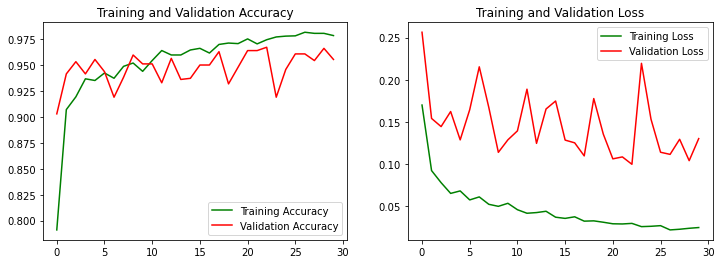

In [183]:
plot_fun(model_baseline_fit, epochs)

## Discussion of model 1

Add your thoughts here.

In [179]:
# Model 2
inputs = keras.Input(shape=(img_height, img_width, grayscale))
x = Rescaling(1./255)(inputs)
x = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Dense(128, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(1, activation='sigmoid')(x)
model2 = keras.Model(inputs=inputs, outputs=outputs)

# Compile the Neural network
model2.compile(optimizer = keras.optimizers.Adam(learning_rate), 
                        loss = 'binary_crossentropy',
                        metrics = ['accuracy', 
                                   keras.metrics.Recall(),
                                   keras.metrics.SpecificityAtSensitivity(0.5)])

# Summary
model2.summary()

# Save only the best model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/model2.keras',
        save_best_only=True,
        monitor='val_loss')
]

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 128, 128, 1)]     0         
                                                                 
 rescaling_12 (Rescaling)    (None, 128, 128, 1)       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                     

In [181]:
# Fit model
epochs=15
model2_fit = model2.fit(train_ds,
                        steps_per_epoch=len(train_ds),
                        epochs=epochs,
                        validation_data = val_ds,
                        batch_size=batch_size,
                        callbacks=callbacks,
                        class_weight=class_weights,
                        verbose=2)

AttributeError: 'str' object has no attribute 'keys'

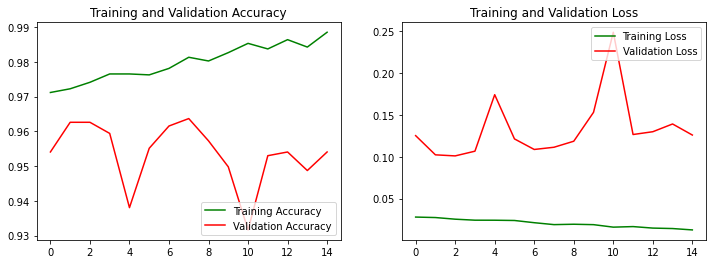

In [172]:
plot_fun(model2_fit, epochs)

## Discussion
Model 2 is able to overfit. This means that the model has the statistical power to generlize and not be underfitted. The next goal is to maximize generalization performance. I will use a dropout layer to regularize.

In [150]:
# Model 3
# Include a dropout
from keras.layers import Dropout

#learning_rate = 0.001
#batch_size=32

inputs = keras.Input(shape=(img_height, img_width, grayscale))
x = Rescaling(1./255)(inputs)
x = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Dense(128, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)
model3 = keras.Model(inputs=inputs, outputs=outputs)

# Compile the Neural network
model3.compile(optimizer = keras.optimizers.Adam(learning_rate), 
                        loss = 'binary_crossentropy',
                        metrics = ['accuracy', 
                                   keras.metrics.Recall(),
                                   keras.metrics.SpecificityAtSensitivity(0.5)])

# Summary
model3.summary()

# Save only the best model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/model3.keras',
        save_best_only=True,
        monitor='val_loss')
]

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 128, 128, 1)]     0         
                                                                 
 rescaling_5 (Rescaling)     (None, 128, 128, 1)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                     

Epoch 1/20
118/118 [==============================] - 28s 235ms/step - loss: 0.4157 - accuracy: 0.8119 - recall_5: 0.9626 - specificity_at_sensitivity_5: 0.9225 - val_loss: 0.2019 - val_accuracy: 0.9263 - val_recall_5: 0.9435 - val_specificity_at_sensitivity_5: 0.9959
Epoch 2/20
118/118 [==============================] - 28s 237ms/step - loss: 0.1778 - accuracy: 0.9301 - recall_5: 0.9578 - specificity_at_sensitivity_5: 0.9980 - val_loss: 0.1817 - val_accuracy: 0.9391 - val_recall_5: 0.9232 - val_specificity_at_sensitivity_5: 0.9959
Epoch 3/20
118/118 [==============================] - 27s 230ms/step - loss: 0.1399 - accuracy: 0.9466 - recall_5: 0.9692 - specificity_at_sensitivity_5: 0.9990 - val_loss: 0.1508 - val_accuracy: 0.9423 - val_recall_5: 0.9319 - val_specificity_at_sensitivity_5: 1.0000
Epoch 4/20
118/118 [==============================] - 29s 241ms/step - loss: 0.1267 - accuracy: 0.9496 - recall_5: 0.9703 - specificity_at_sensitivity_5: 0.9971 - val_loss: 0.1113 - val_accurac

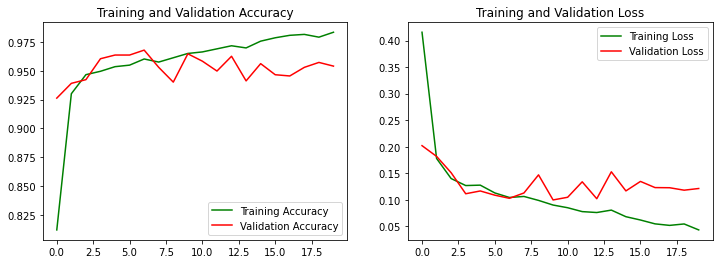

In [151]:
# Fit model
epochs=20
model3_fit = model3.fit(train_ds,
                        #steps_per_epoch=len(train_ds),
                         epochs=epochs,
                         validation_data = val_ds,
                         batch_size=batch_size,
                         callbacks=callbacks,
                         verbose=1)

plot_fun(model3_fit, epochs)

## Model 3 discussion
Including a dropout layer does decrease the overfitting. In the next model I will augment the data by rotating, flipping, and zooming on the images

In [152]:
# Model 4: Data augmentationl

learning_rate = 0.0005

from keras import layers

data_augmentation = Sequential(
        [
            layers.RandomFlip('horizontal'),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.2),
        ])

from keras.layers import Dropout

inputs = keras.Input(shape=(img_height, img_width, grayscale))
x = data_augmentation(inputs)
x = Rescaling(1./255)(x)
x = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Dense(128, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)
model4 = keras.Model(inputs=inputs, outputs=outputs)

# Compile the Neural network
model4.compile(optimizer = keras.optimizers.Adam(learning_rate), 
                        loss = 'binary_crossentropy',
                        metrics = ['accuracy', 
                                   keras.metrics.Recall(),
                                   keras.metrics.SpecificityAtSensitivity(0.5)])

# Summary
model4.summary()

# Save only the best model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/model4.keras',
        save_best_only=True,
        monitor='val_loss')
]

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 128, 128, 1)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 128, 128, 1)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 128, 128, 1)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 64, 64, 64)        18496     
                                                          

Epoch 1/30
118/118 [==============================] - 42s 342ms/step - loss: 0.5695 - accuracy: 0.7271 - recall_6: 0.9890 - specificity_at_sensitivity_6: 0.6078 - val_loss: 0.4231 - val_accuracy: 0.8515 - val_recall_6: 0.9275 - val_specificity_at_sensitivity_6: 0.9959
Epoch 2/30
118/118 [==============================] - 42s 352ms/step - loss: 0.3628 - accuracy: 0.8404 - recall_6: 0.9238 - specificity_at_sensitivity_6: 0.9529 - val_loss: 0.3563 - val_accuracy: 0.8558 - val_recall_6: 0.8333 - val_specificity_at_sensitivity_6: 1.0000
Epoch 3/30
118/118 [==============================] - 40s 341ms/step - loss: 0.3003 - accuracy: 0.8733 - recall_6: 0.9274 - specificity_at_sensitivity_6: 0.9824 - val_loss: 0.2618 - val_accuracy: 0.8846 - val_recall_6: 0.9319 - val_specificity_at_sensitivity_6: 1.0000
Epoch 4/30
118/118 [==============================] - 41s 345ms/step - loss: 0.2867 - accuracy: 0.8783 - recall_6: 0.9304 - specificity_at_sensitivity_6: 0.9873 - val_loss: 0.2533 - val_accurac

118/118 [==============================] - 39s 330ms/step - loss: 0.1583 - accuracy: 0.9384 - recall_6: 0.9615 - specificity_at_sensitivity_6: 0.9980 - val_loss: 0.2781 - val_accuracy: 0.9071 - val_recall_6: 0.8884 - val_specificity_at_sensitivity_6: 0.9959
Epoch 23/30
118/118 [==============================] - 40s 336ms/step - loss: 0.1535 - accuracy: 0.9442 - recall_6: 0.9655 - specificity_at_sensitivity_6: 0.9961 - val_loss: 0.2715 - val_accuracy: 0.9092 - val_recall_6: 0.8899 - val_specificity_at_sensitivity_6: 1.0000
Epoch 24/30
118/118 [==============================] - 40s 340ms/step - loss: 0.1518 - accuracy: 0.9434 - recall_6: 0.9659 - specificity_at_sensitivity_6: 0.9980 - val_loss: 0.2716 - val_accuracy: 0.9113 - val_recall_6: 0.8928 - val_specificity_at_sensitivity_6: 1.0000
Epoch 25/30
118/118 [==============================] - 40s 336ms/step - loss: 0.1505 - accuracy: 0.9440 - recall_6: 0.9655 - specificity_at_sensitivity_6: 0.9931 - val_loss: 0.2603 - val_accuracy: 0.910

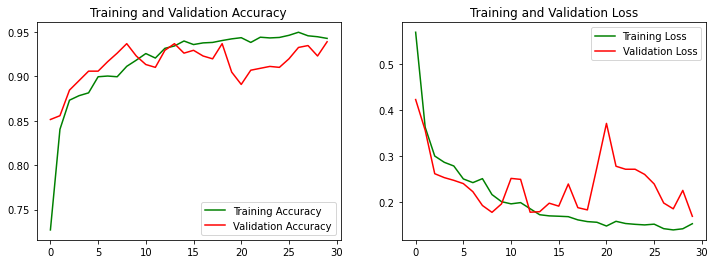

In [153]:
# Fit model
epochs=30
#batch_size = 8
model4_fit = model4.fit(train_ds,
                        steps_per_epoch=len(train_ds),
                         epochs=epochs,
                         validation_data = val_ds,
                         batch_size=batch_size,
                         callbacks=callbacks)
plot_fun(model4_fit, epochs)

In [ ]:
# Discussion 5 epochs

In [45]:
# Model with transfer learning
from keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(img_height, img_width, 3))

conv_base.trainable = False

conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [51]:
# Model 5
# With a pretrained model

learning_rate = 0.00005

inputs = keras.Input(shape=(img_height, img_width, grayscale))
x = data_augmentation(inputs)
x = Conv2D(3,(3,3), padding='same')(x)
x = keras.applications.vgg19.preprocess_input(x)
x = conv_base(x)
x = Flatten()(x)
x = Dense(256)(x)
x = Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model5 = keras.Model(inputs, outputs)

# Compile
model5.compile(loss='binary_crossentropy',
               optimizer=keras.optimizers.Adam(learning_rate),
               metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/m5_feature_extraction_with_data_augmentation.keras',
        save_best_only=True,
        monitor='val_loss')
]

Epoch 1/20
118/118 [==============================] - 138s 1s/step - loss: 0.5463 - accuracy: 0.8074 - val_loss: 0.2990 - val_accuracy: 0.8921
Epoch 2/20
118/118 [==============================] - 140s 1s/step - loss: 0.3266 - accuracy: 0.8642 - val_loss: 0.2232 - val_accuracy: 0.9145
Epoch 3/20
118/118 [==============================] - 141s 1s/step - loss: 0.2943 - accuracy: 0.8837 - val_loss: 0.2480 - val_accuracy: 0.8964
Epoch 4/20
118/118 [==============================] - 140s 1s/step - loss: 0.2716 - accuracy: 0.8890 - val_loss: 0.2623 - val_accuracy: 0.8953
Epoch 5/20
118/118 [==============================] - 142s 1s/step - loss: 0.2721 - accuracy: 0.8906 - val_loss: 0.2350 - val_accuracy: 0.8953
Epoch 6/20
118/118 [==============================] - 138s 1s/step - loss: 0.2468 - accuracy: 0.9002 - val_loss: 0.2248 - val_accuracy: 0.9049
Epoch 7/20
118/118 [==============================] - 138s 1s/step - loss: 0.2297 - accuracy: 0.9104 - val_loss: 0.1748 - val_accuracy: 0.9306

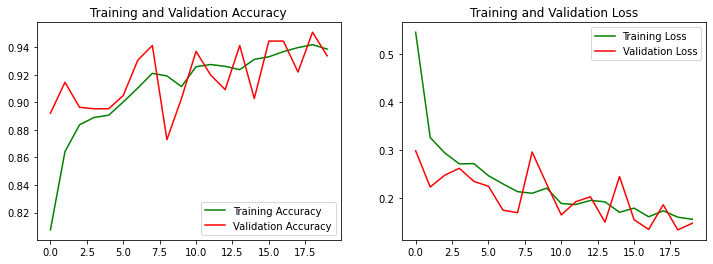

In [54]:
batch_size = 32
epochs = 20
model5_fit = model5.fit(train_ds,
                         #steps_per_epoch=10,
                         epochs=epochs,
                         validation_data = val_ds,
                         batch_size=batch_size,
                         callbacks=callbacks)
plot_fun(model5_fit, epochs)

In [56]:
# Model 6: Unfreeze more layers
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False
    
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/m6_pretrained_cnn_top4unfrozen.keras',
        save_best_only=True,
        monitor='val_loss')
]

epochs = 30

model6_fit = model5.fit(train_ds,
                        epochs = epochs,
                        validation_data=val_ds,
                        callbacks=callbacks)

Epoch 1/30
118/118 [==============================] - 139s 1s/step - loss: 0.1562 - accuracy: 0.9386 - val_loss: 0.1523 - val_accuracy: 0.9402
Epoch 2/30
118/118 [==============================] - 139s 1s/step - loss: 0.1565 - accuracy: 0.9389 - val_loss: 0.1575 - val_accuracy: 0.9327
Epoch 3/30
118/118 [==============================] - 140s 1s/step - loss: 0.1680 - accuracy: 0.9392 - val_loss: 0.1417 - val_accuracy: 0.9476
Epoch 4/30
118/118 [==============================] - 138s 1s/step - loss: 0.1572 - accuracy: 0.9405 - val_loss: 0.1288 - val_accuracy: 0.9466
Epoch 5/30
118/118 [==============================] - 137s 1s/step - loss: 0.1633 - accuracy: 0.9408 - val_loss: 0.1705 - val_accuracy: 0.9274
Epoch 6/30
118/118 [==============================] - 138s 1s/step - loss: 0.1668 - accuracy: 0.9325 - val_loss: 0.1451 - val_accuracy: 0.9402
Epoch 7/30
118/118 [==============================] - 140s 1s/step - loss: 0.1495 - accuracy: 0.9405 - val_loss: 0.2139 - val_accuracy: 0.9241

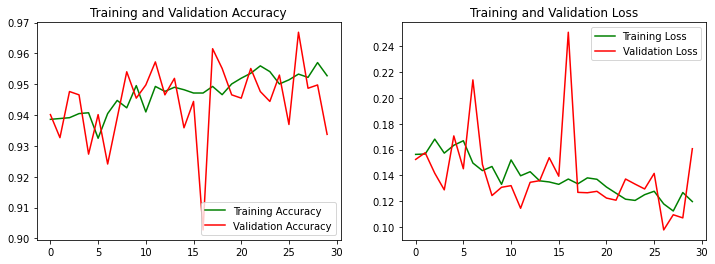

In [57]:
plot_fun(model6_fit, epochs)

In [149]:
# Analyze models on test data

def model_evaluate(best_model, test_data):
    model = keras.models.load_model(best_model)
    test_loss, test_accuracy, test_recall, test_specificity = model.evaluate(test_data)
    print(f'Test accuracy of {best_model}: {test_accuracy:.3f}')

model_evaluate('models/keras/baseline_model.keras', test_ds)
model_evaluate('models/keras/model2.keras', test_ds)
model_evaluate('models/keras/model3.keras', test_ds)
model_evaluate('models/keras/model4.keras', test_ds)


37/37 [==============================] - 3s 71ms/step - loss: 0.1239 - accuracy: 0.9556 - recall_2: 0.9719 - specificity_at_sensitivity_2: 0.9937
Test accuracy of models/keras/baseline_model.keras: 0.956
37/37 [==============================] - 3s 87ms/step - loss: 0.1337 - accuracy: 0.9514 - recall_4: 0.9778 - specificity_at_sensitivity_4: 0.9937
Test accuracy of models/keras/model2.keras: 0.951


ValueError: in user code:

    File "/home/kevinspring/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "/home/kevinspring/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/kevinspring/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "/home/kevinspring/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "/home/kevinspring/anaconda3/envs/tf/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/kevinspring/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_14" is incompatible with the layer: expected shape=(None, 64, 64, 1), found shape=(None, 128, 128, 1)


In [60]:
def model_evaluate(best_model, test_data):
    model = keras.models.load_model(best_model)
    test_loss, test_accuracy = model.evaluate(test_data)
    print(f'Test accuracy of {best_model}: {test_accuracy:.3f}')

model_evaluate('models/keras/m5_feature_extraction_with_data_augmentation.keras', test_ds)
model_evaluate('models/keras/m6_pretrained_cnn_top4unfrozen.keras', test_ds)

37/37 [==============================] - 13s 344ms/step - loss: 0.1297 - accuracy: 0.9514
Test accuracy of models/keras/m5_feature_extraction_with_data_augmentation.keras: 0.951
37/37 [==============================] - 14s 365ms/step - loss: 0.1179 - accuracy: 0.9556
Test accuracy of models/keras/m6_pretrained_cnn_top4unfrozen.keras: 0.956


In [ ]:
# save and pickle model
model_best = model4
model_best_dir = 'models/best/model_xray_class.h5'
model_best.save(model_best_dir)

In [173]:
def predict_pneumonia(img_source, model):
    from tensorflow.keras.utils import load_img, img_to_array
    from tensorflow import keras
    
    # Load the model from the file
    model = keras.models.load_model(model)
    
    # Load the image
    img = load_img(img_source,
                   color_mode='grayscale',
                   target_size=(128,128))
    
    # Construct the tensor that .predict is expecting
    #img = load_img(img_source, target_size=(64, 64))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)/255
    
    # get the prediction and return
    prediction = model.predict(img, verbose=0)
    print(prediction)
    return prediction

img_src = 'app_img.jpeg'
model_src = 'models/keras/model2.keras'

predict_pneumonia('app_img.jpeg', model_src)
predict_pneumonia('app_img_pneumonia.jpg', model_src)
predict_pneumonia('data/PNEUMONIA/person1_bacteria_1.jpeg', model_src)
predict_pneumonia('data/NORMAL/IM-0001-0001.jpeg', model_src)

[[0.84227645]]
[[0.8426332]]
[[0.84216887]]
[[0.8413512]]


array([[0.8413512]], dtype=float32)

In [156]:
predict_pneumonia('apple.jpeg', model_src)

[[0.98806727]]


array([[0.98806727]], dtype=float32)